In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns


df = pd.read_csv(r"exo-det_type.csv")
print(len(df))

for col in df.columns:
    data_type = df[col].dtype
    print(f"Column '{col}': Data Type = {data_type}")

7509
Column 'detection_type': Data Type = object
Column 'mass': Data Type = float64
Column 'radius': Data Type = float64
Column 'orbital_period': Data Type = float64
Column 'semi_major_axis': Data Type = float64
Column 'eccentricity': Data Type = float64
Column 'inclination': Data Type = float64
Column 'discovered': Data Type = int64
Column 'omega': Data Type = float64
Column 'star_distance': Data Type = float64
Column 'star_mass': Data Type = float64
Column 'star_radius': Data Type = float64
Column 'star_age': Data Type = float64
Column 'star_teff': Data Type = float64


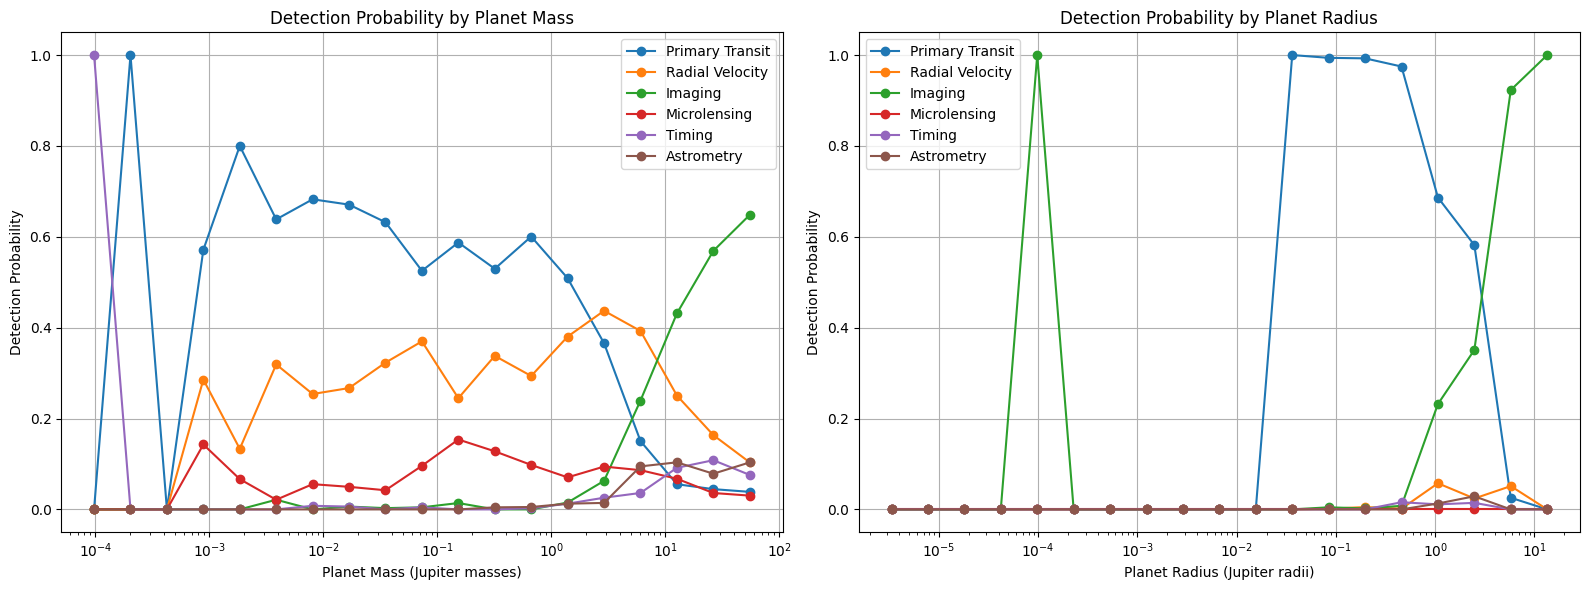

Detection Method Distribution:
detection_type
Primary Transit    4509
Radial Velocity    1260
Imaging            1047
Microlensing        313
Astrometry          202
Timing              178
Name: count, dtype: int64


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
def plot_detection_probability(df):
    # Group detection types
    detection_methods = df['detection_type'].unique()
    
    # Create a figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Mass-based detection probability
    mass_bins = np.logspace(np.log10(df['mass'].min()), np.log10(df['mass'].max()), 20)
    
    # Detection probability by mass for each detection method
    mass_detection_prob = {}
    for method in detection_methods:
        method_df = df[df['detection_type'] == method]
        
        # Calculate detection probability for each mass bin
        method_mass_prob = []
        for i in range(len(mass_bins)-1):
            bin_min = mass_bins[i]
            bin_max = mass_bins[i+1]
            
            # Planets in this mass range
            planets_in_bin = df[(df['mass'] >= bin_min) & (df['mass'] < bin_max)]
            
            # Planets detected in this method and mass range
            detected_in_bin = planets_in_bin[planets_in_bin['detection_type'] == method]
            
            # Calculate probability
            prob = len(detected_in_bin) / len(planets_in_bin) if len(planets_in_bin) > 0 else 0
            method_mass_prob.append(prob)
        
        mass_detection_prob[method] = method_mass_prob
    
    # Plot mass-based detection probability
    ax1.set_xscale('log')
    for method, probs in mass_detection_prob.items():
        ax1.plot((mass_bins[:-1] + mass_bins[1:]) / 2, probs, label=method, marker='o')
    
    ax1.set_xlabel('Planet Mass (Jupiter masses)')
    ax1.set_ylabel('Detection Probability')
    ax1.set_title('Detection Probability by Planet Mass')
    ax1.legend()
    ax1.grid(True)
    
    # Radius-based detection probability
    radius_bins = np.logspace(np.log10(df['radius'].min()), np.log10(df['radius'].max()), 20)
    
    # Detection probability by radius for each detection method
    radius_detection_prob = {}
    for method in detection_methods:
        method_df = df[df['detection_type'] == method]
        
        # Calculate detection probability for each radius bin
        method_radius_prob = []
        for i in range(len(radius_bins)-1):
            bin_min = radius_bins[i]
            bin_max = radius_bins[i+1]
            
            # Planets in this radius range
            planets_in_bin = df[(df['radius'] >= bin_min) & (df['radius'] < bin_max)]
            
            # Planets detected in this method and radius range
            detected_in_bin = planets_in_bin[planets_in_bin['detection_type'] == method]
            
            # Calculate probability
            prob = len(detected_in_bin) / len(planets_in_bin) if len(planets_in_bin) > 0 else 0
            method_radius_prob.append(prob)
        
        radius_detection_prob[method] = method_radius_prob
    
    # Plot radius-based detection probability
    ax2.set_xscale('log')
    for method, probs in radius_detection_prob.items():
        ax2.plot((radius_bins[:-1] + radius_bins[1:]) / 2, probs, label=method, marker='o')
    
    ax2.set_xlabel('Planet Radius (Jupiter radii)')
    ax2.set_ylabel('Detection Probability')
    ax2.set_title('Detection Probability by Planet Radius')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()


# Call the function to create the plot
plot_detection_probability(df)

# Optional: Print detection method distribution
print("Detection Method Distribution:")
print(df['detection_type'].value_counts())

C:\Users\arpan\AppData\Local\Temp\ipykernel_38208\2744364932.py:46: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


<Figure size 1200x600 with 0 Axes>

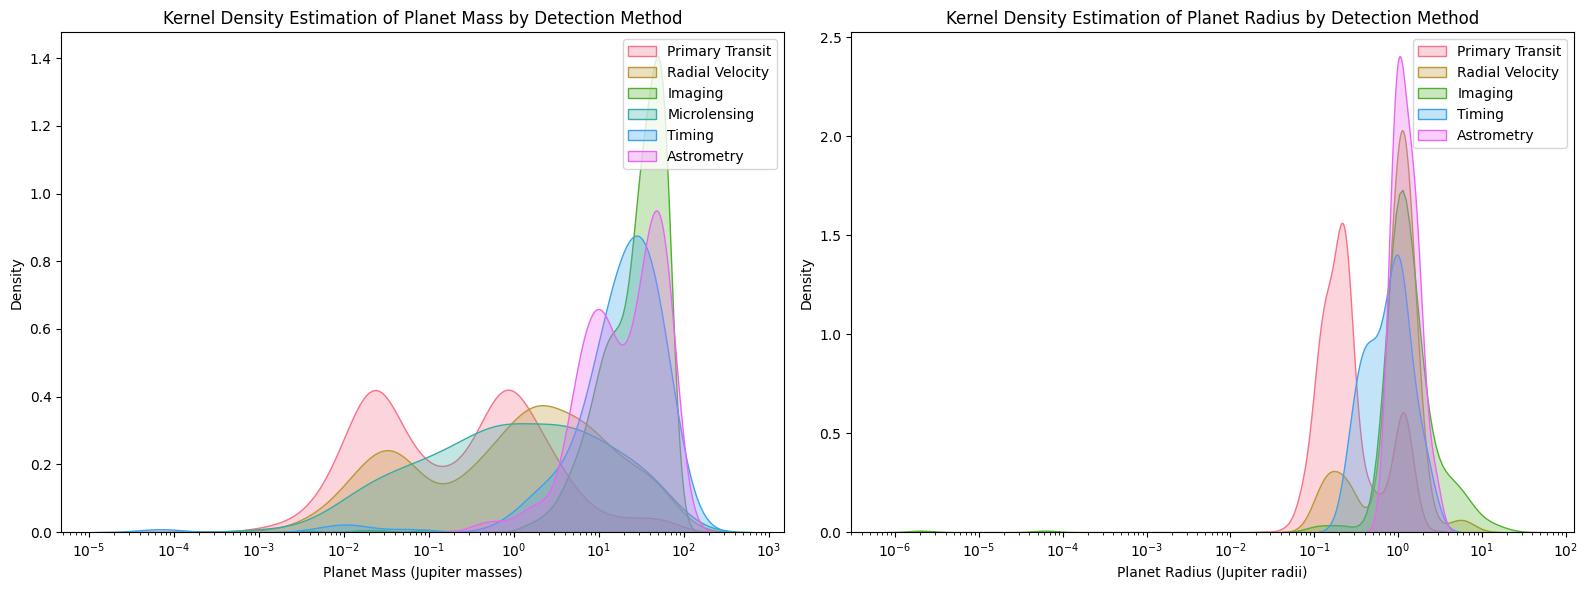

Detection Method Distribution:
detection_type
Primary Transit    4509
Radial Velocity    1260
Imaging            1047
Microlensing        313
Astrometry          202
Timing              178
Name: count, dtype: int64


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a function to generate KDE plot
def create_planet_kde_plot(df):
    # Set up the plot
    plt.figure(figsize=(12, 6))
    
    # Get unique detection methods
    detection_methods = df['detection_type'].unique()
    
    # Create a color palette
    palette = sns.color_palette("husl", len(detection_methods))
    
    # Create subplots for mass and radius
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # KDE plot for Mass
    for method, color in zip(detection_methods, palette):
        method_data = df[df['detection_type'] == method]
        
        # Log scale for mass
        sns.kdeplot(
            data=method_data, 
            x='mass', 
            ax=ax1, 
            label=method, 
            color=color,
            fill=True,
            alpha=0.3,
            log_scale=True
        )
    
    ax1.set_title('Kernel Density Estimation of Planet Mass by Detection Method')
    ax1.set_xlabel('Planet Mass (Jupiter masses)')
    ax1.set_ylabel('Density')
    ax1.legend()
    
    # KDE plot for Radius
    for method, color in zip(detection_methods, palette):
        method_data = df[df['detection_type'] == method]
        
        # Log scale for radius
        sns.kdeplot(
            data=method_data, 
            x='radius', 
            ax=ax2, 
            label=method, 
            color=color,
            fill=True,
            alpha=0.3,
            log_scale=True
        )
    
    ax2.set_title('Kernel Density Estimation of Planet Radius by Detection Method')
    ax2.set_xlabel('Planet Radius (Jupiter radii)')
    ax2.set_ylabel('Density')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()


# Create the KDE plot
create_planet_kde_plot(df)

# Print detection method distribution
print("Detection Method Distribution:")
print(df['detection_type'].value_counts())